First, import the appropriate Deep Learning FastAI libraries and dependencies

In [6]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Run the next block in order to initialize libraries as variables that can be used


In [7]:
from fastbook import *
from fastai.vision.widgets import *

Now define appropriate label categories for the dependent variable we are targetting for. In this case we are seeking to identify moles that can be classified as either 'melanoma', 'nevus' or 'seborrheic keratosis'. Melanoma would be considered cancerous and if found, would be advised to see a doctor/dermatologist. Nevus moles are considered borderline and has the capacity to turn Melanomic (advise would be to keep track of the moles and see if they change in the future as there is possibility for a Nevus mole to become Melanomic). Seborrheic Keratosis is considered non-cancerous.

In [8]:
mole_types = 'melanoma','nevus','seborrheic_keratosis'
path = Path('data')

Initializing the Dataloaders

In [9]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

Initialize the DataBlock - this will split the training data into training and validation set whereby 20% (0.2) of the aggregate data will be allocated for validation purposes. the get_y function will retrieve parent or categorical labels from the folder names. item_tfrms as set to an empty array means that the images used within the DataBlock will not be resized and left as default (this is appropriate given the data set we are using has already undergone data wrangling and cleaning).


In [10]:
moles = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[])



Set up the transformation of mole data into the DeepLearning model.


In [13]:
moles = moles.new(
    item_tfms=RandomResizedCrop(224 ,min_scale=0.5),
    batch_tfms=aug_transforms())
dls = moles.dataloaders(path)

utilizing PIL from the imported ImageFile library fixes an internal GPU error within Google Colabs. Please run this block before running the 'learn' blocks.

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

We will use the Resnet18 CNN Deeplearning model for the purposes of this Image Classifer.


In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


Fine tune the model. From the values given, a good initial number of iterations for fine tuning would be 7. Anymore than 7 would incur overfitting as per the increasing value in the error value rate.

In [16]:
learn.fine_tune(11)

epoch,train_loss,valid_loss,error_rate,time
0,1.519532,1.048873,0.289720,02:00


epoch,train_loss,valid_loss,error_rate,time
0,1.071956,0.774227,0.280374,02:09
1,0.997465,0.669280,0.252336,02:08
2,0.865592,0.560839,0.214953,02:07
3,0.761639,0.441476,0.140187,02:13
4,0.686778,0.475970,0.121495,02:10
5,0.617397,0.547126,0.158879,02:07
6,0.561861,0.469450,0.102804,02:05
7,0.513308,0.443799,0.112150,02:05
8,0.471133,0.458311,0.121495,02:09
9,0.444161,0.464220,0.140187,02:06


Vizualise the above tabular data into a plot graph in order to see where the validation loss values versus training loss values. Where the value of the Valid Loss is higher than the Train Loss, then the threshold for overfitting may have occurred.


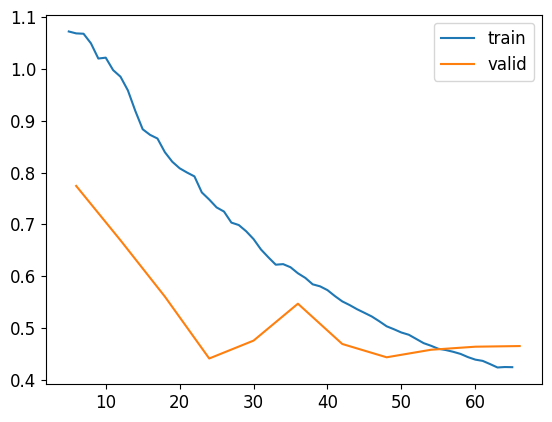

In [19]:
learn.recorder.plot_loss()

Vizuale the accuracy of our deep learning model by using a confusion matrix as to see how many True Positives and False Negatives occur when checking the valid accuracy of mole identification

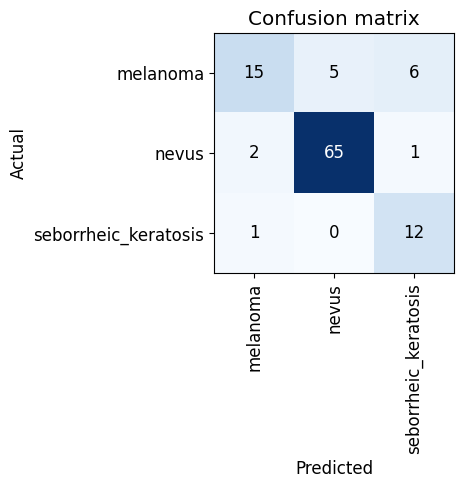

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [40]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [42]:
img = PILImage.create(btn_upload.data[-1])

In [43]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [44]:
pred,pred_idx,probs = learn_inf.predict(img)

In [45]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: melanoma; Probability: 0.5717')

In [46]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [47]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [48]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [49]:
VBox([widgets.Label('Check your mole'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [50]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting u

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.4 OK
